# Sample Collection

In [1]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
%matplotlib inline


# Data Preprocessing

Importing the dataset

In [2]:
tumour_data = pd.read_csv('tumour.csv')

In [3]:
tumour_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
print("Data type : ", type(tumour_data))
print("Data dims : ", tumour_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (569, 33)


In [5]:
print(tumour_data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
tumour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Clearing Unused Values

In [7]:
#dropping Unnamed
tumour_data.drop(['Unnamed: 32'],axis=1, inplace = True)
#dropping ID
tumour_data.drop(['id'],axis=1, inplace = True)

In [8]:
# Replace 'M' with 1 and 'B' with 0 in the 'diagnosis' column
tumour_data['diagnosis'] = tumour_data['diagnosis'].map({'M': 1, 'B': 0})

# Convert the column to float64
tumour_data['diagnosis'] = tumour_data['diagnosis'].astype('float64')

Updated Data

In [9]:
tumour_data.shape

(569, 31)

In [10]:
tumour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
tumour_data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [12]:
#checking for null values
nan_count = tumour_data.isna().sum()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the NaN counts
print(nan_count)

# Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


No null values are present in some columns hence no replacements are required.

# Exploratory Data Analysis

In [13]:
#Finding out correlation between diagnosis and other values

tumour_df = tumour_data['diagnosis']

feature_corr = tumour_data[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
                'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
feature_corr = feature_corr.corr()
#feature_corr.sort_values(by='diagnosis', ascending = False)
feature_corr[['diagnosis']].sort_values('diagnosis', ascending = False)


diagnosis
diagnosis                 1.000000
concave points_worst      0.793566
perimeter_worst           0.782914
concave points_mean       0.776614
radius_worst              0.776454
perimeter_mean            0.742636
area_worst                0.733825
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
concavity_worst           0.659610
compactness_mean          0.596534
compactness_worst         0.590998
radius_se                 0.567134
perimeter_se              0.556141
area_se                   0.548236
texture_worst             0.456903
smoothness_worst          0.421465
symmetry_worst            0.416294
texture_mean              0.415185
concave points_se         0.408042
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_worst   0.323872
compactness_se            0.292999
concavity_se              0.253730
fractal_dimension_se      0.077972
symmetry_se              -0.006522
texture_se               -0.008303
fractal_dimension_mean   -0.012838
smoothness_se            -0.067016

==================== Note ====================

At this point, we wanted to test the hypothesis/guess that the top 10 variables were the ones which we needed

- Hence the two correlation matrixes

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

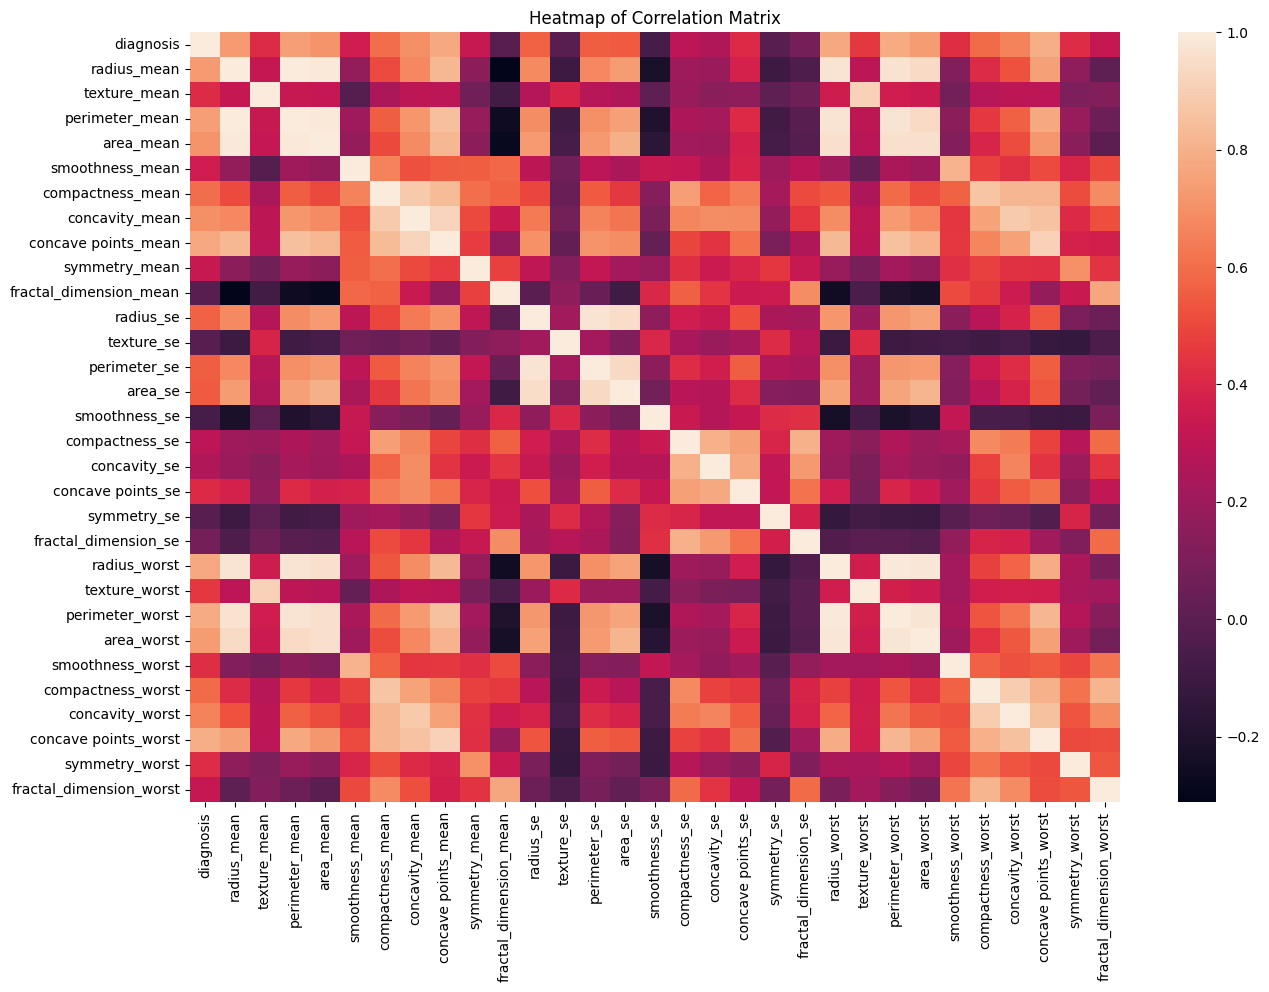

In [15]:
# Corellation Matrix + Heatmap of AllVariables
corr = tumour_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

diagnosis  radius_mean  perimeter_mean  area_mean  \
diagnosis              1.000000     0.730029        0.742636   0.708984   
radius_mean            0.730029     1.000000        0.997855   0.987357   
perimeter_mean         0.742636     0.997855        1.000000   0.986507   
area_mean              0.708984     0.987357        0.986507   1.000000   
concavity_mean         0.696360     0.676764        0.716136   0.685983   
concave points_mean    0.776614     0.822529        0.850977   0.823269   
radius_worst           0.776454     0.969539        0.969476   0.962746   
perimeter_worst        0.782914     0.965137        0.970387   0.959120   
area_worst             0.733825     0.941082        0.941550   0.959213   
concavity_worst        0.659610     0.526911        0.563879   0.512606   
concave points_worst   0.793566     0.744214        0.771241   0.722017   

                      concavity_mean  concave points_mean  radius_worst  \
diagnosis                   0.696360             0.776614      0.776454   
radius_mean                 0.676764             0.822529      0.969539   
perimeter_mean              0.716136             0.850977      0.969476   
area_mean                   0.685983             0.823269      0.962746   
concavity_mean              1.000000             0.921391      0.688236   
concave points_mean         0.921391             1.000000      0.830318   
radius_worst                0.688236             0.830318      1.000000   
perimeter_worst             0.729565             0.855923      0.993708   
area_worst                  0.675987             0.809630      0.984015   
concavity_worst             0.884103             0.752399      0.573975   
concave points_worst        0.861323             0.910155      0.787424   

                      perimeter_worst  area_worst  concavity_worst  \
diagnosis                    0.782914    0.733825         0.659610   
radius_mean                  0.965137    0.941082         0.526911   
perimeter_mean               0.970387    0.941550         0.563879   
area_mean                    0.959120    0.959213         0.512606   
concavity_mean               0.729565    0.675987         0.884103   
concave points_mean          0.855923    0.809630         0.752399   
radius_worst                 0.993708    0.984015         0.573975   
perimeter_worst              1.000000    0.977578         0.618344   
area_worst                   0.977578    1.000000         0.543331   
concavity_worst              0.618344    0.543331         1.000000   
concave points_worst         0.816322    0.747419         0.855434   

                      concave points_worst  
diagnosis                         0.793566  
radius_mean                       0.744214  
perimeter_mean                    0.771241  
area_mean                         0.722017  
concavity_mean                    0.861323  
concave points_mean               0.910155  
radius_worst                      0.787424  
perimeter_worst                   0.816322  
area_worst                        0.747419  
concavity_worst                   0.855434  
concave points_worst              1.000000

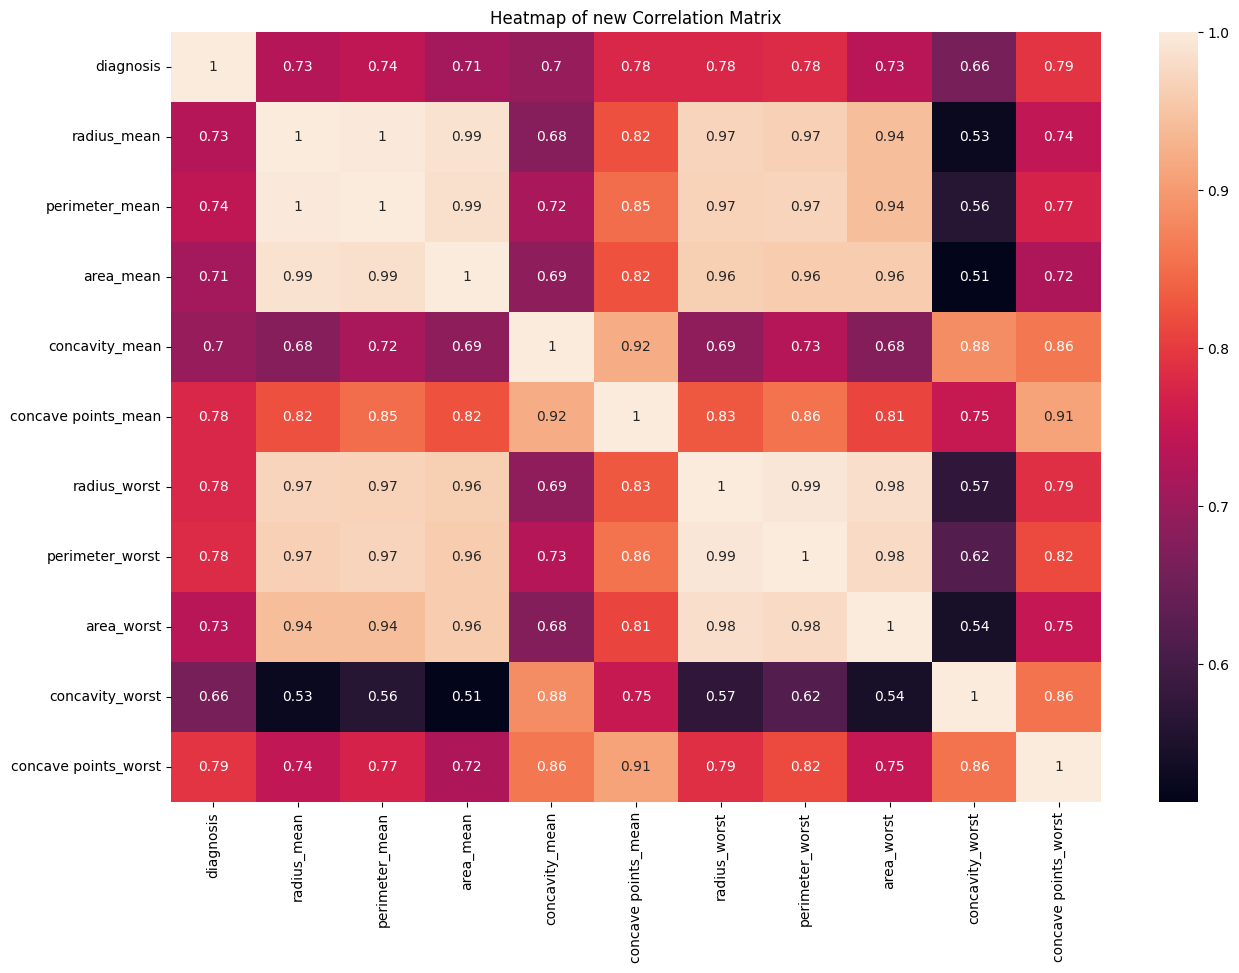

In [16]:
#Correlation matrix of top 10
new_cols = list(corr.diagnosis[(corr.diagnosis > 0.6)].index.values)
new_corr = tumour_data[new_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(new_corr, annot=True,
            xticklabels=new_corr.columns.values,
            yticklabels=new_corr.columns.values)
plt.title('Heatmap of new Correlation Matrix')
new_corr

Univariate Visualisation of one of our variables
- Note that malignant tumors are skewed towards the right
- Still slightly unclear distinction as there is an overlap

<Axes: xlabel='radius_mean', ylabel='diagnosis'>

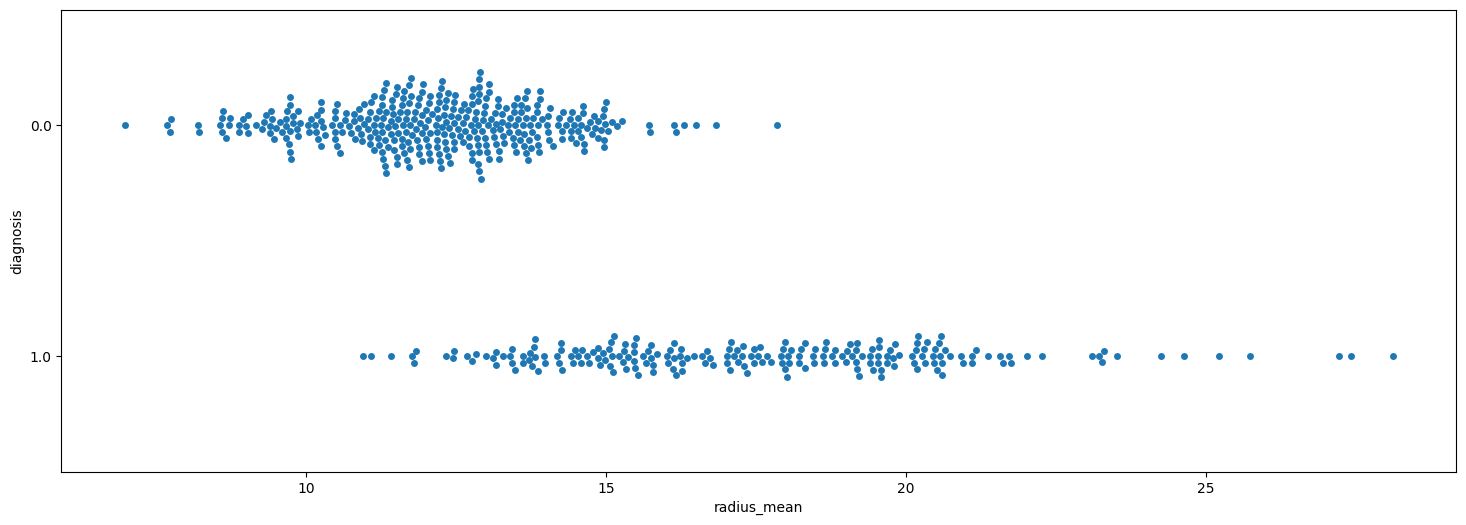

In [17]:
diagnosis = pd.DataFrame(tumour_data['diagnosis'])  # Response
radius_mean = pd.DataFrame(tumour_data['radius_mean'])      # Predictor

# Create a joint dataframe by concatenating SalePrice and CentralAir
trainDF = pd.concat([diagnosis, radius_mean], axis = 1).reindex(diagnosis.index)

# Joint Swarmplot of SalePrice Train against CentralAir Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "radius_mean", y = "diagnosis", data = trainDF, orient = "h")

Bivariate Visualisaion of "Top 10 Variables" to solve our problems
- Clearer boundary between malignant and benign
- One reason why we went with logistic decision boundaries

Top 10 Correlations (Excluding Diagnosis):
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


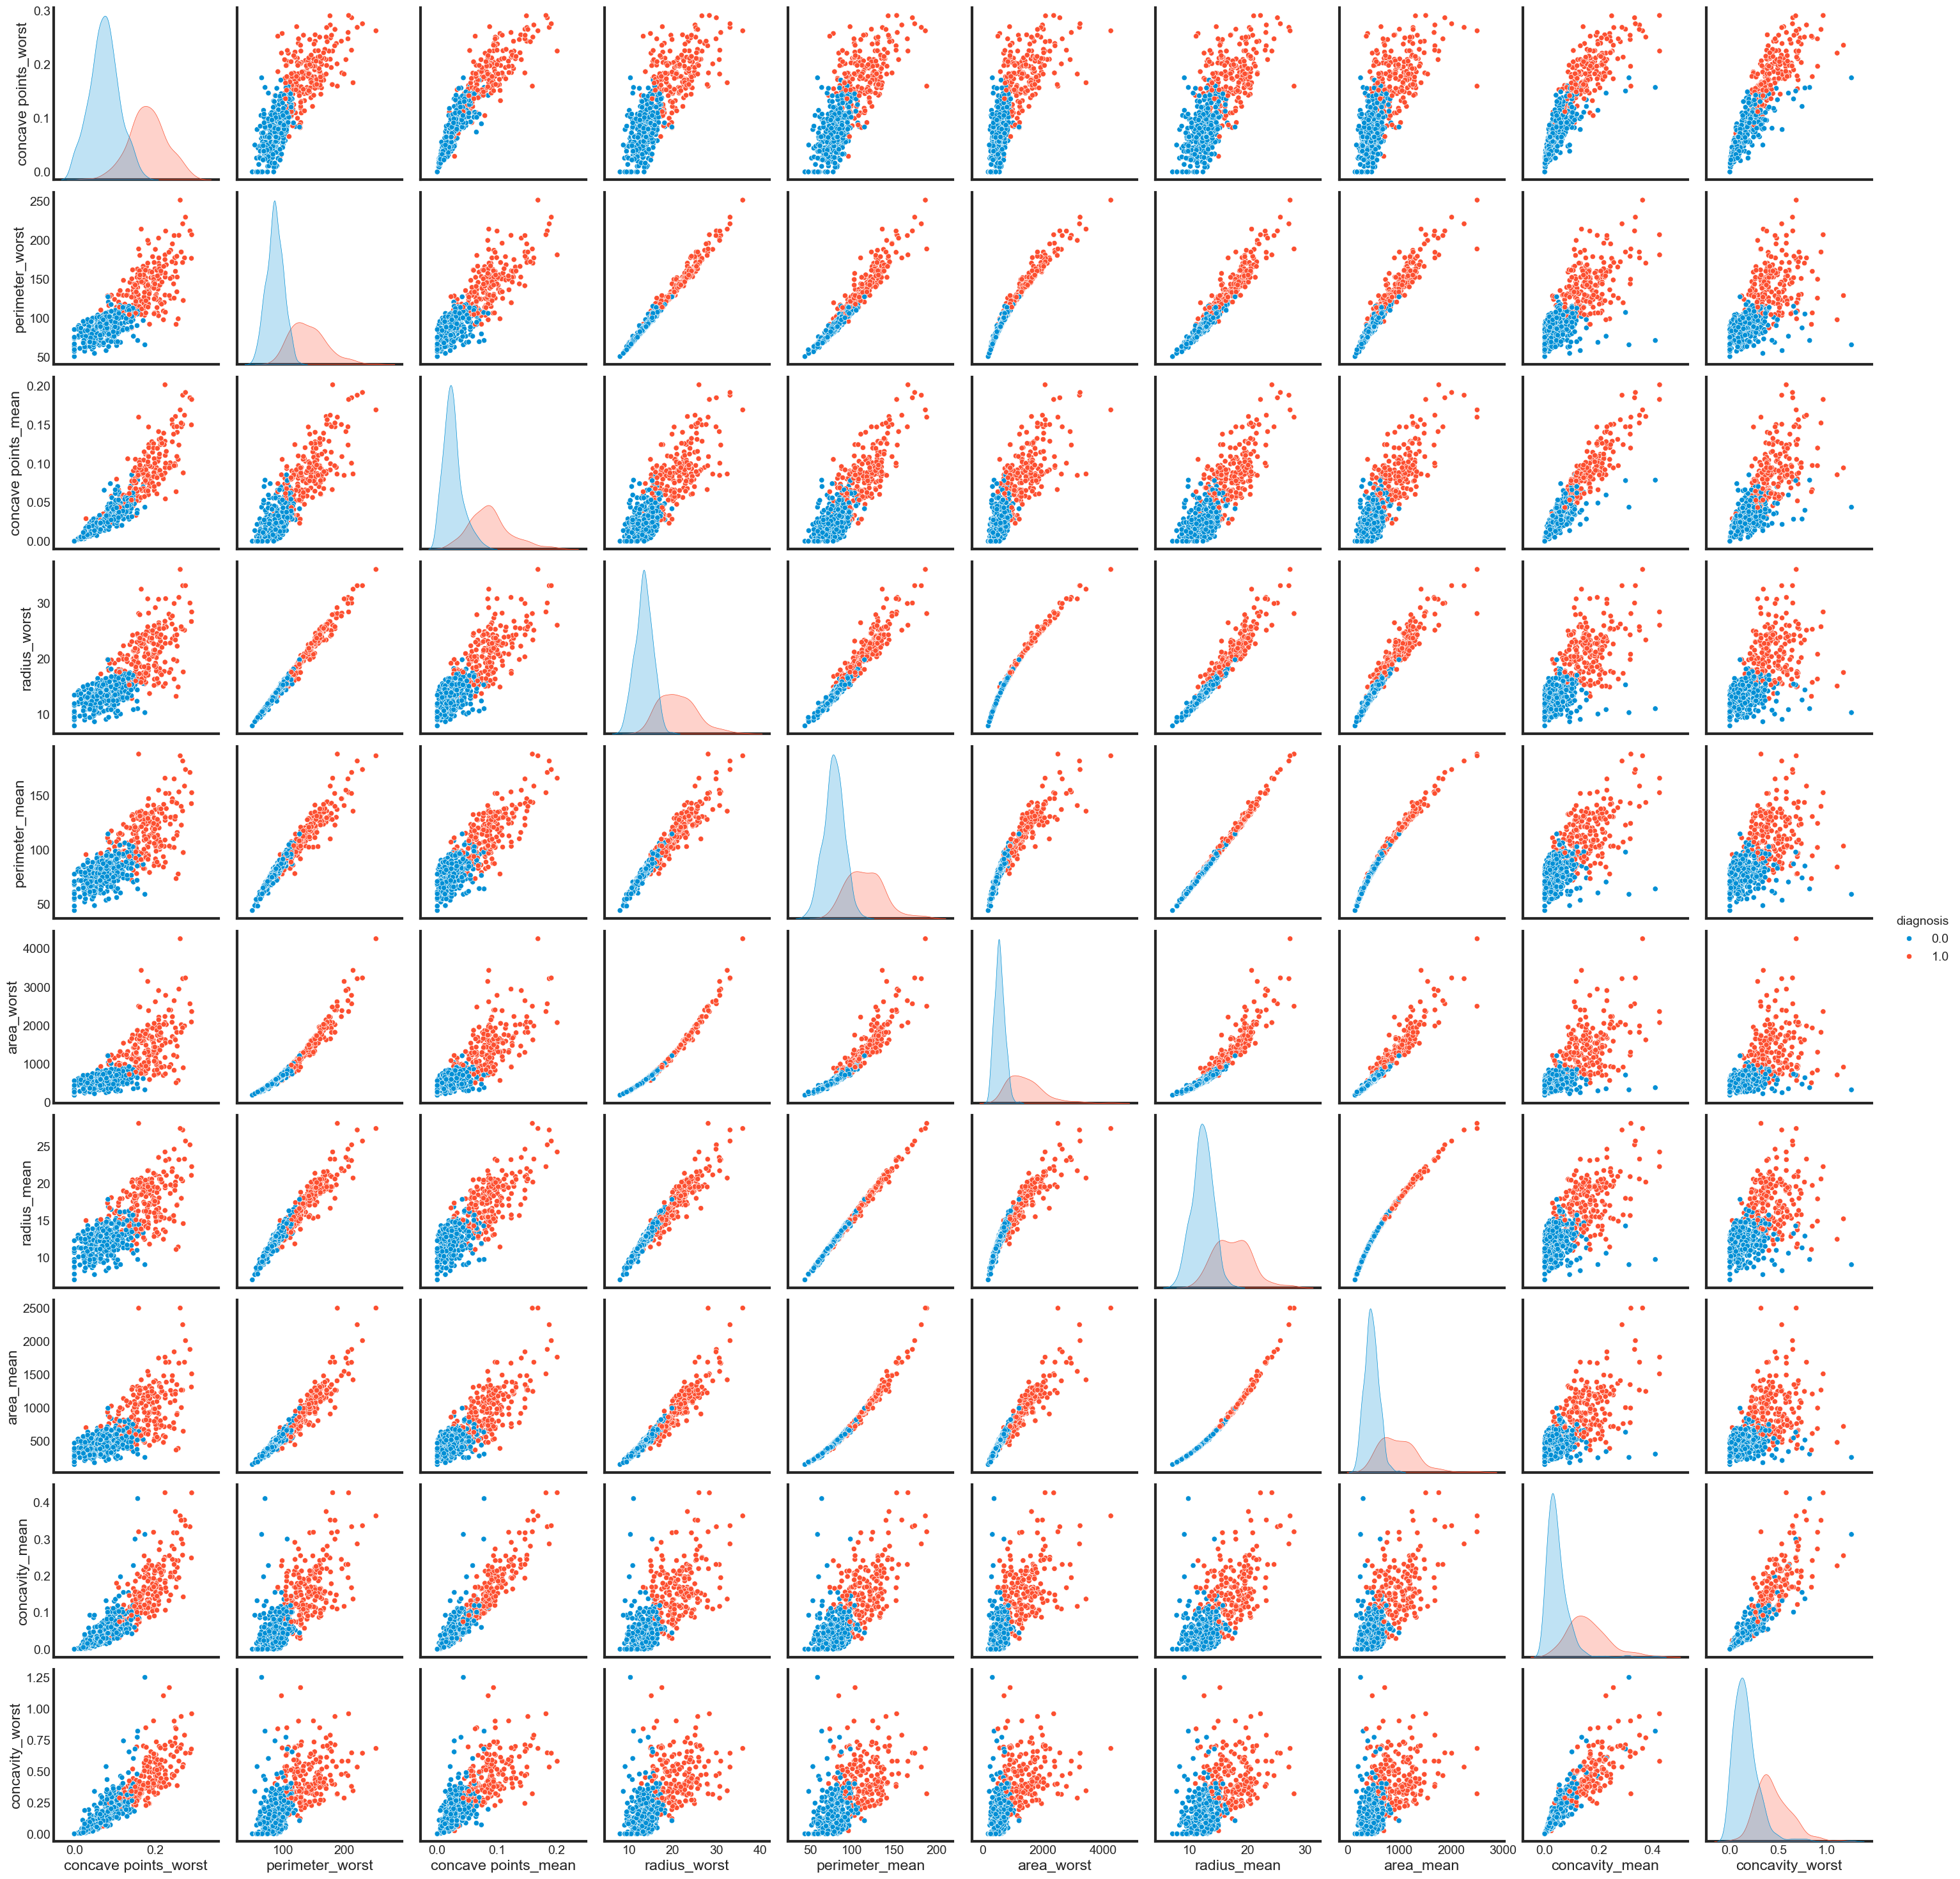

In [18]:
# Get the top 10 correlations (excluding diagnosis)
top_correlations = feature_corr['diagnosis'].drop('diagnosis').nlargest(10)

# Display the top 10 correlations
print("Top 10 Correlations (Excluding Diagnosis):")
print(top_correlations)

# Pair plot of the top 10

# Get the top 10 correlated features (excluding diagnosis)
top_correlated_features = top_correlations.index

# Select the top correlated features along with diagnosis for pair plot
pair_plot_data = tumour_data[list(top_correlated_features) + ['diagnosis']]

# Visualizing Multidimensional Relationships
plt.style.use('fivethirtyeight')
sb.set_style("white")
sb.pairplot(pair_plot_data, hue='diagnosis', height=3)
plt.show()

# Machine Learning Exploration

### Logistic Regression w/ Top 10 Features

Scale top 10 features

In [25]:
# Scaling top 10 features
temp_data = pd.read_csv('tumour.csv')

# Select the top 10 features (excluding 'diagnosis')
top_features = ['perimeter_mean', 'radius_mean', 'area_mean', 'concave points_mean', 'concavity_mean',
                'perimeter_worst', 'radius_worst', 'area_worst', 'concave points_worst', 'concavity_worst']

# Create a new DataFrame with only the diagnosis and top features
top_features_data = temp_data[['diagnosis'] + top_features].copy()

# Transform the 'M' and 'B' values in the 'diagnosis' column to 1 and 0 respectively
top_features_data['diagnosis'] = top_features_data['diagnosis'].map({'M': 1, 'B': 0})

# Scale the values
scaler = StandardScaler()
scaled_top_features = pd.DataFrame(scaler.fit_transform(top_features_data.drop(columns=['diagnosis'])), 
                                   columns=top_features)

# Add the diagnosis column back to the scaled DataFrame
scaled_top_features['diagnosis'] = top_features_data['diagnosis']

# Display the scaled top features
print(scaled_top_features.head())

   perimeter_mean  radius_mean  area_mean  concave points_mean  \
0        1.269934     1.097064   0.984375             2.532475   
1        1.685955     1.829821   1.908708             0.548144   
2        1.566503     1.579888   1.558884             2.037231   
3       -0.592687    -0.768909  -0.764464             1.451707   
4        1.776573     1.750297   1.826229             1.428493   

   concavity_mean  perimeter_worst  radius_worst  area_worst  \
0        2.652874         2.303601      1.886690    2.001237   
1       -0.023846         1.535126      1.805927    1.890489   
2        1.363478         1.347475      1.511870    1.456285   
3        1.915897        -0.249939     -0.281464   -0.550021   
4        1.371011         1.338539      1.298575    1.220724   

   concave points_worst  concavity_worst  diagnosis  
0              2.296076         2.109526          1  
1              1.087084        -0.146749          1  
2              1.955000         0.854974          1  
3 

In [26]:
# Split the data to train and test sets
X = scaled_top_features.loc[:, scaled_top_features.columns != 'diagnosis']
y = scaled_top_features['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 10), (398,), (171, 10), (171,))

398 Training and 171 Test

Below is now logistic regression for the top 10 variables

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9649122807017544
Confusion Matrix:
[[104   4]
 [  2  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



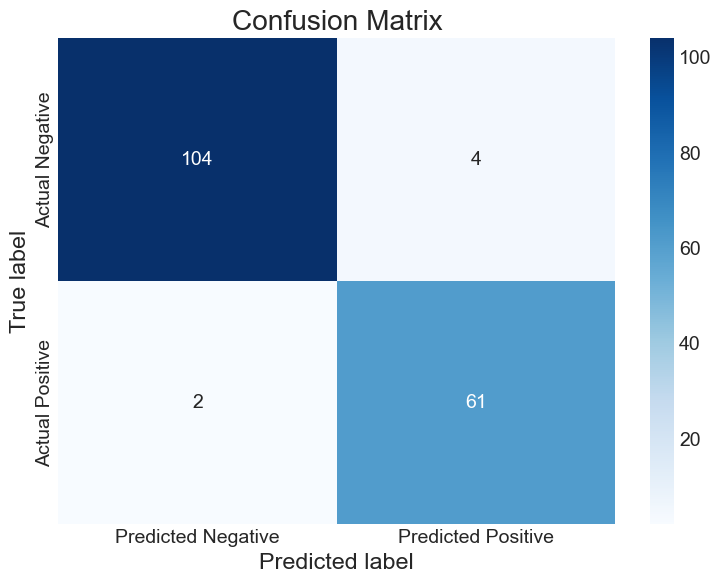

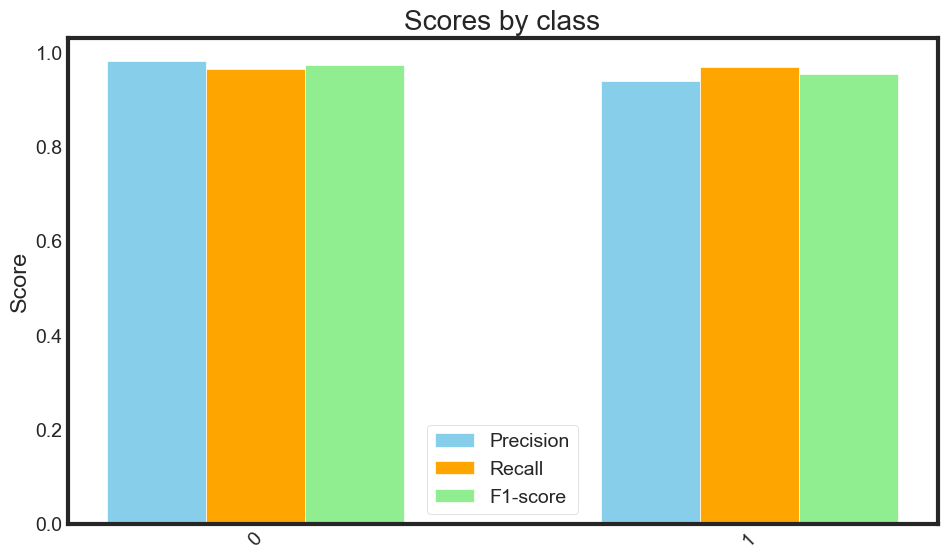

In [28]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Extract precision, recall, and F1-score from the classification report
report_data = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report_data.keys())[:-3]

precision = [report_data[class_name]['precision'] for class_name in class_names]
recall = [report_data[class_name]['recall'] for class_name in class_names]
f1_score = [report_data[class_name]['f1-score'] for class_name in class_names]

# Plot Classification Report
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
bar2 = ax.bar(x, recall, width, label='Recall', color='orange')
bar3 = ax.bar(x + width, f1_score, width, label='F1-score', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.xticks(rotation=45)
plt.show()

Logistic Regression Decision Boundary Visualisation

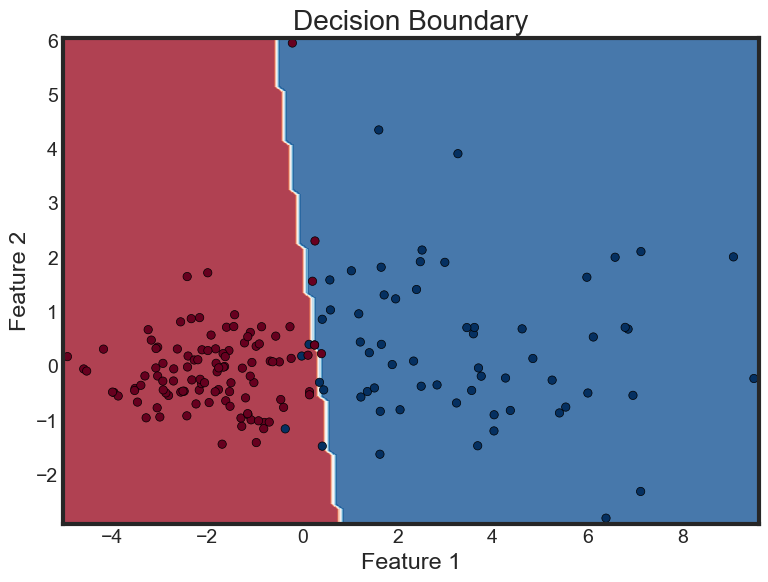

In [35]:
from sklearn.decomposition import PCA 
 
# First, reduce your data to two principal components 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X) 
 
# Split the reduced data 
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42) 
 
# Train logistic regression on the 2 principal components 
logreg = LogisticRegression() 
logreg.fit(X_train_pca, y_train) 
 
# Now use your plotting function, but with the 2D test data 
plt.figure(figsize=(8, 6)) 
plot_decision_boundary(X_test_pca, y_test, logreg) 
plt.show()


### Recursive Feature Elimination with Cross-Validation (RFECV)



Although 30 features leads to a higher accuracy, we determined that 16 features is optimal as it is a good tradeoff between model accuracy and simplicity

Optimal number of features: 30


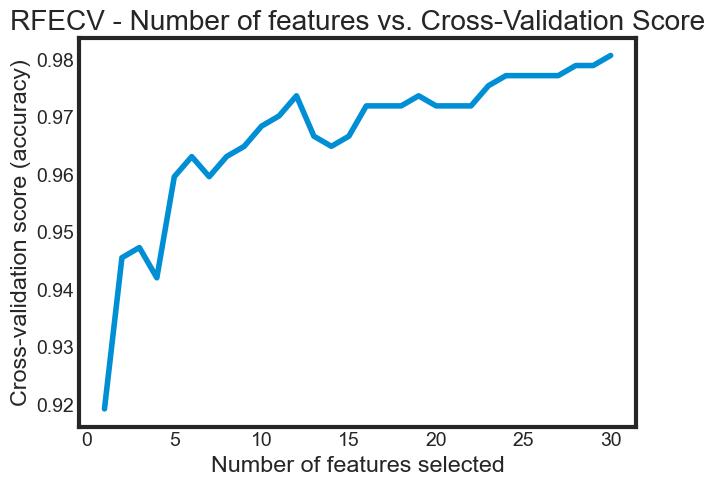

In [23]:
X = tumour_data.drop('diagnosis', axis=1)  # Feature set
y = tumour_data['diagnosis']  # Target variable

# Standardizing the data is often beneficial for many models
scaler = StandardScaler()

# Initialize the classifier
classifier = LogisticRegression()

# Create the RFE object with cross-validation
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy', min_features_to_select=1)

# Create a pipeline that first scales the data then applies RFECV
pipeline = Pipeline(steps=[('scaler', scaler), ('selector', rfecv)])

# Fit RFECV
pipeline.fit(X, y)

# Print the optimal number of features
print('Optimal number of features:', rfecv.n_features_)

# Access the correct attribute for cross-validation scores
mean_test_scores = rfecv.cv_results_['mean_test_score']

# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('RFECV - Number of features vs. Cross-Validation Score')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.show()

### Random Forest Classification

Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



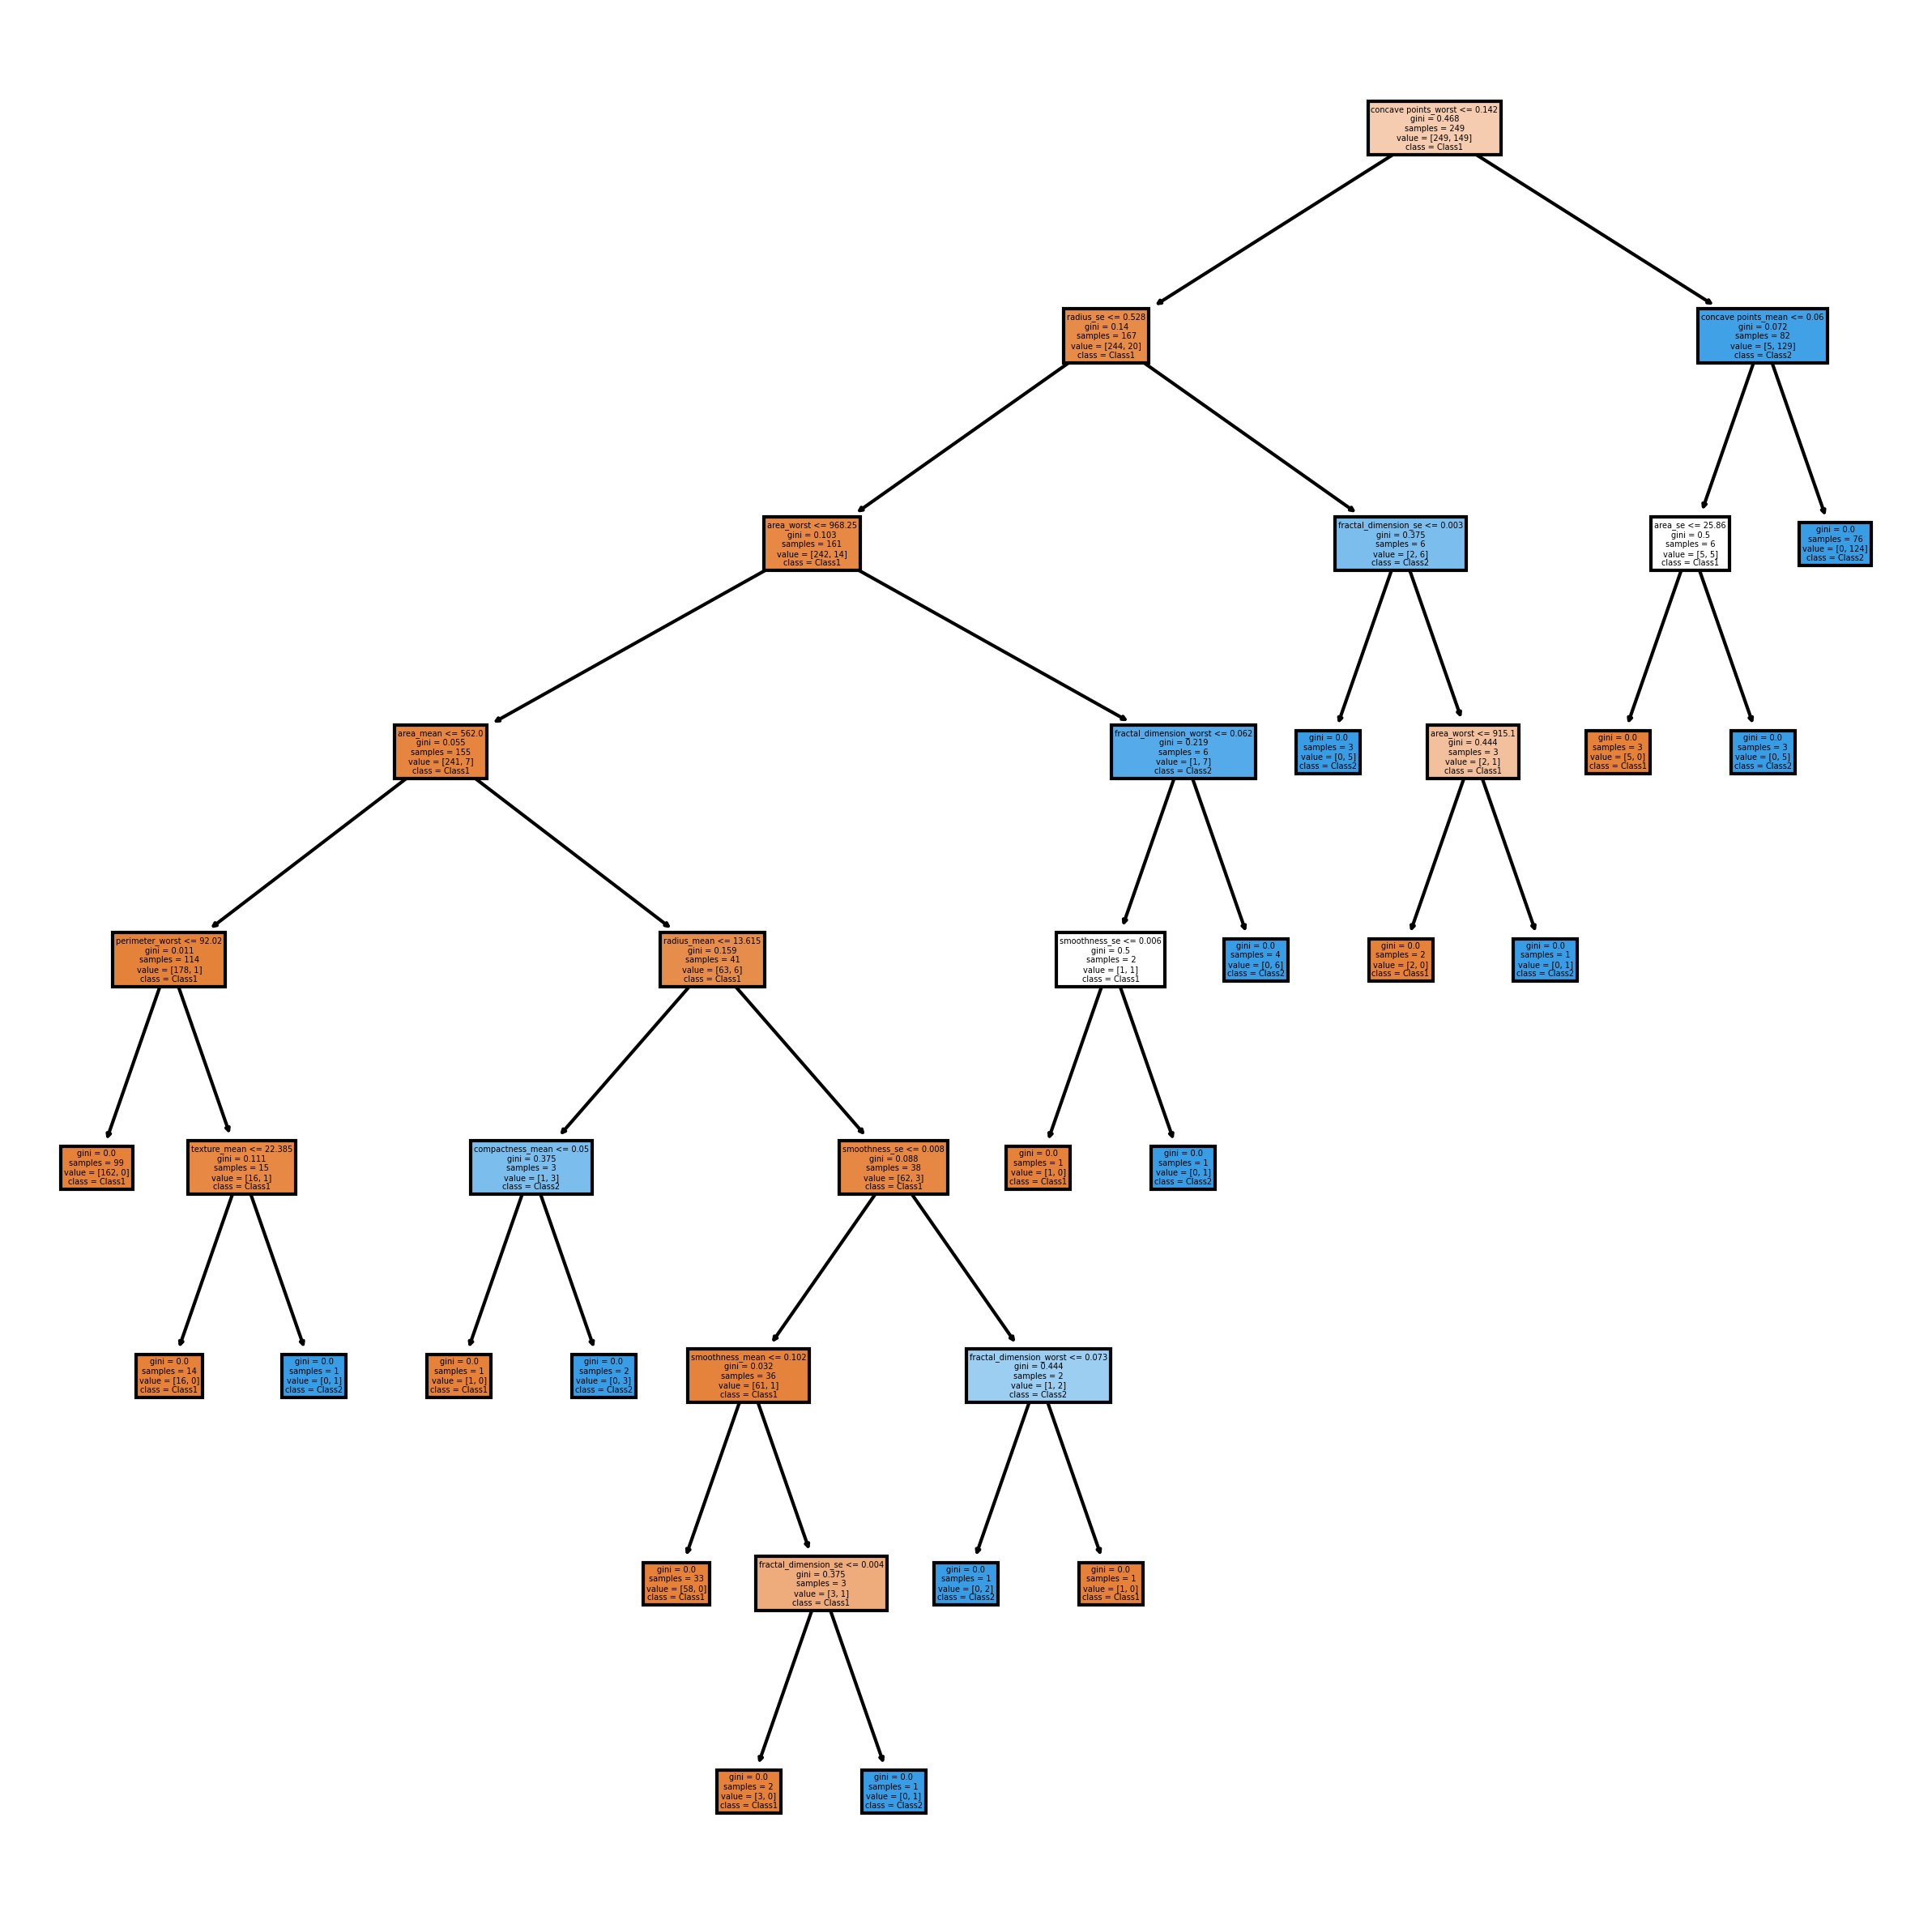

In [ ]:
# Load data
X = tumour_data.drop('diagnosis', axis=1)
y = tumour_data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42) # Using 1000 trees
rf.fit(X_train, y_train)

# Predictions
predictions = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Selecting a single tree
# Extract the first tree from the forest
single_tree = rf.estimators_[0]

# Visualizing the tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10), dpi=300)
tree.plot_tree(single_tree, feature_names=X.columns.tolist(), class_names=['Class1', 'Class2'], filled=True)

# Save the figure or show it
plt.show()

### K-Nearest Neighbours (KNN)

In [19]:
# Separate the features and the target variable
X = tumour_data.drop('diagnosis', axis=1)
y = tumour_data['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNeighborsClassifier
# Set the number of neighbors, 'k'
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       108
         1.0       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



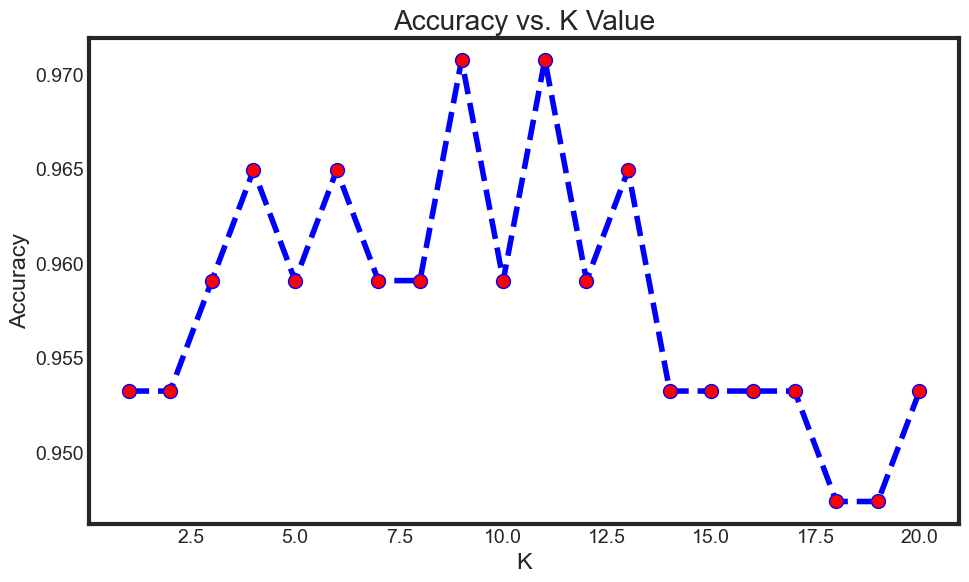

In [20]:
import matplotlib.pyplot as plt

# Test various numbers of neighbors
accuracy_scores = []
for k in range(1, 21):  # Test k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


### Logisitic Regression based on RFECV Features

In [43]:
# Select the top 16 features (excluding 'diagnosis')
top_features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst']

# Create a new DataFrame with only the diagnosis and top features
top_features_data = temp_data[['diagnosis'] + top_features].copy()

# Transform the 'M' and 'B' values in the 'diagnosis' column to 1 and 0 respectively
top_features_data['diagnosis'] = top_features_data['diagnosis'].map({'M': 1, 'B': 0})

# Scale the values
scaler = StandardScaler()
scaled_top_features = pd.DataFrame(scaler.fit_transform(top_features_data.drop(columns=['diagnosis'])), 
                                   columns=top_features)

# Add the diagnosis column back to the scaled DataFrame
scaled_top_features['diagnosis'] = top_features_data['diagnosis']

# Split the data to train and test sets
X = scaled_top_features.loc[:, scaled_top_features.columns != 'diagnosis']
y = scaled_top_features['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9766081871345029
Confusion Matrix:
[[107   1]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



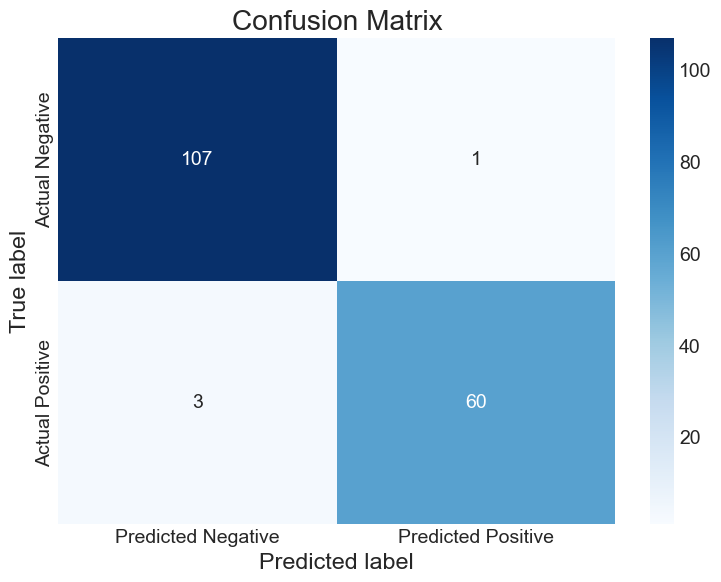

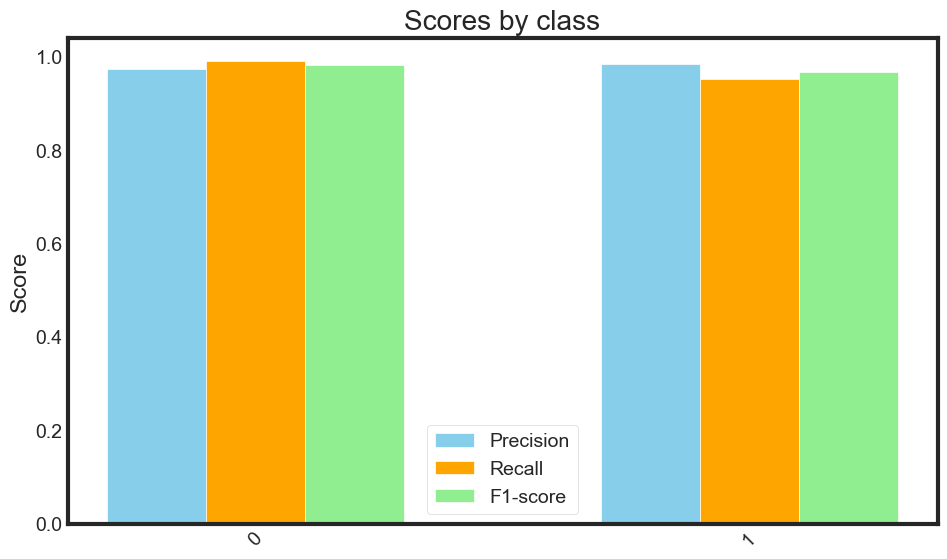

In [46]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Extract precision, recall, and F1-score from the classification report
report_data = classification_report(y_test, y_pred, output_dict=True)
class_names = list(report_data.keys())[:-3]

precision = [report_data[class_name]['precision'] for class_name in class_names]
recall = [report_data[class_name]['recall'] for class_name in class_names]
f1_score = [report_data[class_name]['f1-score'] for class_name in class_names]

# Plot Classification Report
x = np.arange(len(class_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
bar2 = ax.bar(x, recall, width, label='Recall', color='orange')
bar3 = ax.bar(x + width, f1_score, width, label='F1-score', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

plt.xticks(rotation=45)
plt.show()

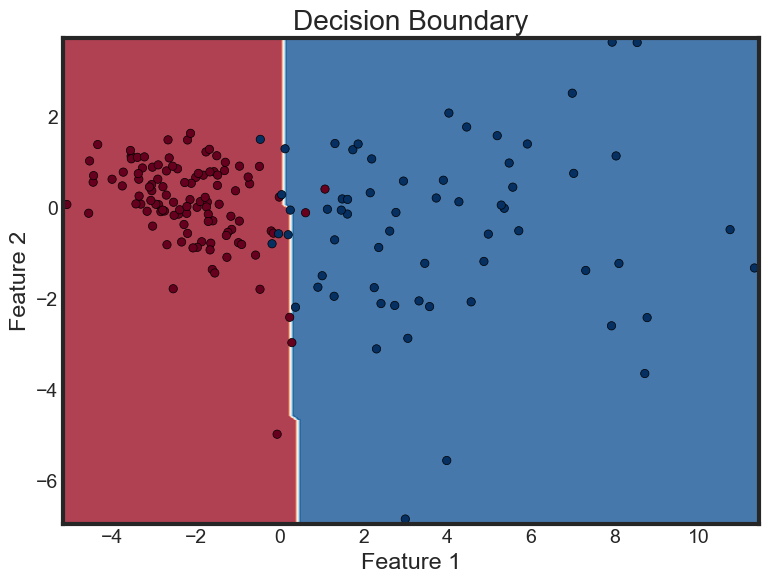

In [47]:
from sklearn.decomposition import PCA 
 
# First, reduce your data to two principal components 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X) 
 
# Split the reduced data 
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42) 
 
# Train logistic regression on the 2 principal components 
logreg = LogisticRegression() 
logreg.fit(X_train_pca, y_train) 
 
# Now use your plotting function, but with the 2D test data 
plt.figure(figsize=(8, 6)) 
plot_decision_boundary(X_test_pca, y_test, logreg) 
plt.show()

# Conclusion

Conducting logistic regression using the best terms and the optimal number of terms according to RFECV seems to be the optimal way to identify whether tumors are benign or malignant. To find the values for specific measurements to distinguish/predict classification, a logistic regression decision boundary may be analysed depending on the user's input variables.

# Attempted Stuff

In [ ]:
# Listing Pairs from best to worst
# Filter out perfect correlations (correlation coefficient of 1)
non_perfect_correlations = top_correlations[top_correlations < 1]

# Sort the correlations in descending order
sorted_correlations = non_perfect_correlations.sort_values(ascending=False)

# Print the list of best pairs from best to worst
print("Best Pairs (Excluding Perfect Correlations):")
print(sorted_correlations)


In [ ]:
# Extract the top correlation pairs from the correlation matrix
best_pairs = []
for feature in sorted_correlations.index:
    # Find the corresponding features with high correlation to the current feature
    related_features = corr[feature][(corr[feature] >= 0.7) & (corr[feature] < 1.0)].index.tolist()
    for related_feature in related_features:
        # Add the pair to the list if not already added and if it's not a perfect correlation
        if (related_feature, feature) not in best_pairs and (feature, related_feature) not in best_pairs:
            best_pairs.append((feature, related_feature))

# Sort the best pairs by correlation strength
best_pairs_sorted = sorted(best_pairs, key=lambda x: corr.loc[x[0], x[1]], reverse=True)

# Define the file path
file_path = "best_correlation_pairs.txt"

# Open the file in write mode
with open(file_path, "w") as file:
    # Write the best correlation pairs to the file
    file.write("Best Correlation Pairs (Excluding Perfect Correlations), Ordered by Correlation Strength:\n")
    for pair in best_pairs_sorted:
        file.write(f"{pair[0]} - {pair[1]} : {corr.loc[pair[0], pair[1]]}\n")

print(f"Best correlation pairs saved to {file_path}")